# Various Visualization Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

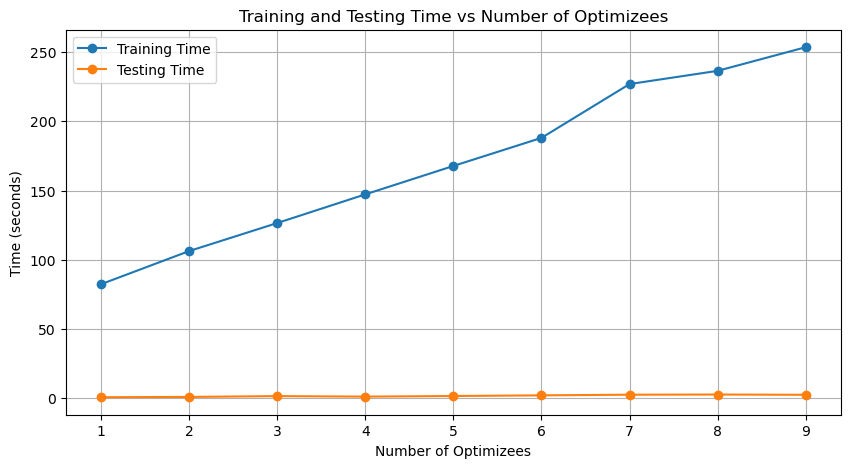

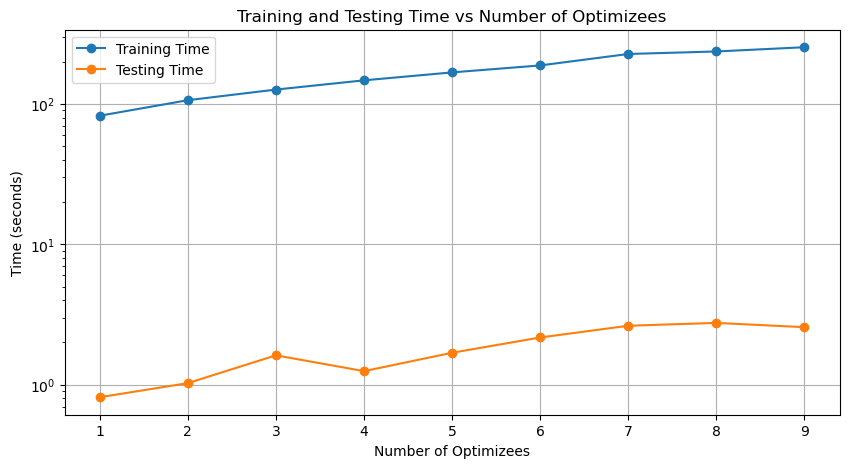

In [26]:
## Times for training and testing
times_train = np.array([82.42480325698853, 106.33278274536133, 126.55835318565369, 147.24324011802673, 167.74936842918396, 188.0204746723175, 226.86464524269104, 236.40270137786865, 253.4552493095398])
times_test = np.array([0.8150663375854492, 1.0271661281585693, 1.6201376914978027, 1.2500276565551758, 1.6896286010742188, 2.1706082820892334, 2.6316046714782715, 2.7575414180755615, 2.570347785949707])


plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 10), times_train, label='Training Time', marker='o')
plt.plot(np.arange(1, 10), times_test, label='Testing Time', marker='o')
plt.xlabel('Number of Optimizees')
plt.ylabel('Time (seconds)')
plt.title('Training and Testing Time vs Number of Optimizees')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
plt.semilogy(np.arange(1, 10), times_train, label='Training Time', marker='o')
plt.semilogy(np.arange(1, 10), times_test, label='Testing Time', marker='o')
plt.xlabel('Number of Optimizees')
plt.ylabel('Time (seconds)')
plt.title('Training and Testing Time vs Number of Optimizees')
plt.legend()
plt.grid()
plt.show()

tensor([580, 493, 276,  ..., 232, 798, 581], dtype=torch.int32)


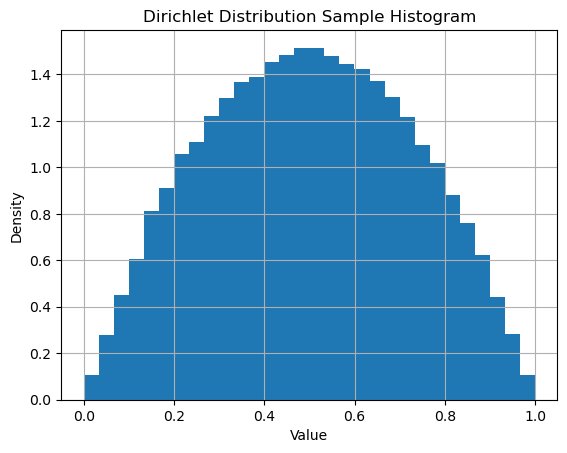

In [27]:
import torch
from torch.distributions import Dirichlet

dist = Dirichlet(torch.tensor([2.0, 2.0]))
samples = dist.sample((100000,))[:,0]
print((samples*1000).int())


plt.hist(samples.numpy(), bins=30, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Dirichlet Distribution Sample Histogram')
plt.grid()
plt.show()

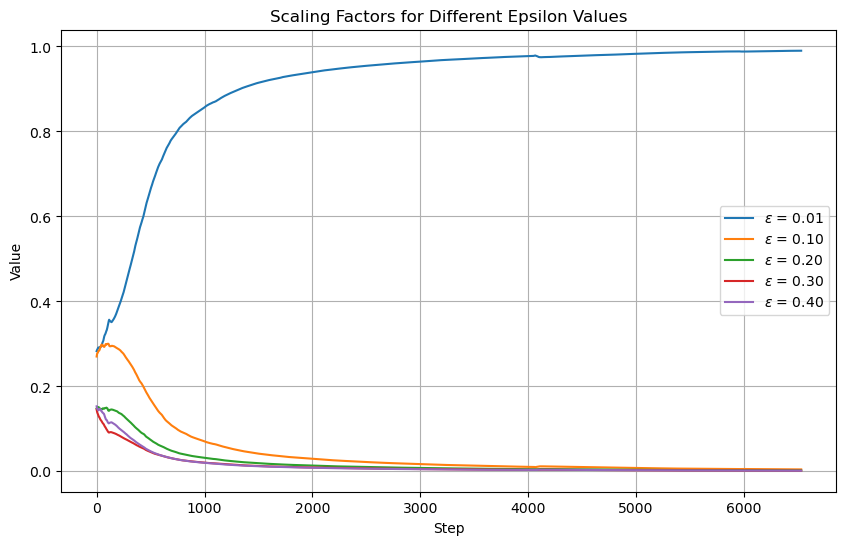

In [28]:
lambdas_ = np.load('lambdas_.npy')
lambdas_ = lambdas_[:,:6531]
x = np.arange(6531)  # X-axis from 0 to 999

plt.figure(figsize=(10, 6))
for i in range(lambdas_.shape[0]):
    if i == 0: plt.plot(x, lambdas_[i], label=r'$\varepsilon$ = 0.01')
    else: plt.plot(x, lambdas_[i], label=r'$\varepsilon$ = {:.2f}'.format(i * 0.1))

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Scaling Factors for Different Epsilon Values')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
lambdas_ = np.load('lambdas_MNIST_Poisoning.npy')


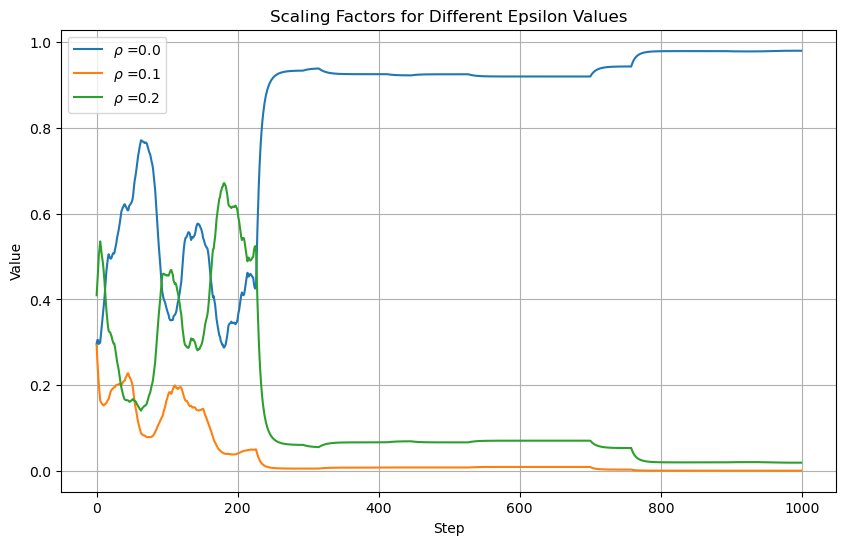

In [2]:
lambdas_ = np.load('lambdas_MNIST_Poisoning.npy')
x = np.arange(len(lambdas_[0]))  # X-axis from 0 to 999

plt.figure(figsize=(10, 6))
for i in range(lambdas_.shape[0]):
    plt.plot(x, lambdas_[i], label=r'$\rho$ =' + str(i * 0.1))

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Scaling Factors for Different Epsilon Values')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
from sklearn.datasets import load_digits
# from torch.nn.functional import one_hot

X_digits, y_digits = load_digits(return_X_y=True)
# y_digits = one_hot(torch.tensor(y_digits, dtype=torch.long), num_classes=10).float()

In [32]:
from skimage.transform import rotate as skimage_rotate
from scipy.ndimage import rotate as ndimage_rotate


In [33]:
X_rotated = np.zeros_like(X_digits)
for i in range(len(X_digits)):
    X_rotated[i]=skimage_rotate(X_digits[i].reshape(8, 8), angle=45).flatten()

In [34]:
X_rotated = np.zeros_like(X_digits)
for i in range(len(X_digits)):
    X_rotated[i]=ndimage_rotate(X_digits[i].reshape(8, 8), angle=45, reshape=False).flatten()

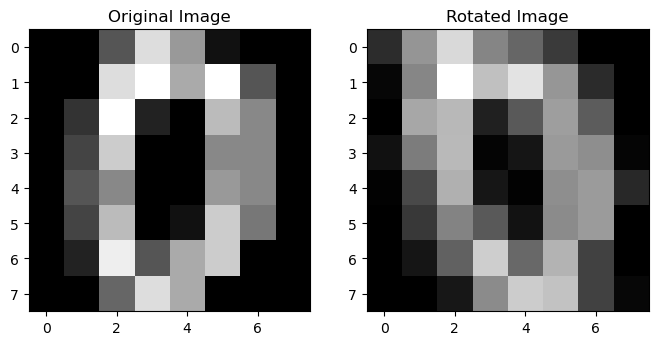

In [38]:
# Visualize true and rotated images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_digits[0].reshape(8, 8), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(skimage_rotate(X_digits[0].reshape(8, 8), angle=20, mode='wrap'), cmap='gray')
plt.title('Rotated Image')
plt.show()

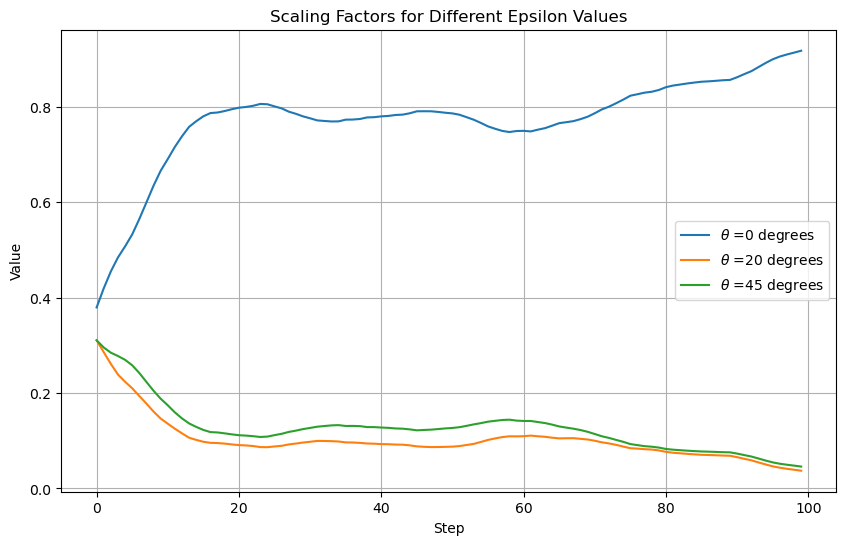

In [36]:
lambdas_ = np.load('lambdas_MNIST_rotation.npy')
x = np.arange(len(lambdas_[0]))  # X-axis from 0 to 999

strs = [0, 20, 45]
plt.figure(figsize=(10, 6))
for i in range(lambdas_.shape[0]):
    plt.plot(x, lambdas_[i], label=r'$\theta$ =' + str(strs[i]) + ' degrees')

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Scaling Factors for Different Epsilon Values')
plt.legend()
plt.grid(True)
plt.show()
